# Bike Sharing System

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

The business goal to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



### Step1: Reading and Understanding the data
Let us first import NumPy and Pandas and read the dataset

In [64]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [65]:
#suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [66]:
bikes=pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [67]:
bikes.shape

(730, 16)

In [68]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [69]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step2:Data Cleaning

In [70]:
#We see that instant is an idex element.Hence dropping it
bikes.drop(['instant'],axis=1,inplace=True)
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [71]:
#We see that we have two seperate columns for year and month. Hence we can consider dteday as a redundant column and eleminate it
bikes.drop(['dteday'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [72]:
#we know that casual+registered=cnt and cnt is our target variable so we will not consider casual and registered
bikes.drop(['casual','registered'],axis=1,inplace=True)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


We see that season,yr,mnth,holiday,weekday, working day wheather sit are categorical variables.
We will replace season,weekday and weathersit with appropriate values

In [73]:
bikes['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [74]:
bikes['weekday'].replace({0:'Sunday',1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"},inplace=True)
bikes['weekday'].value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

In [75]:
bikes['weathersit'].replace({1:"Clear_Few Clouds",2:"Mist_cloudy",3:"Light rain_Light snow_Thunderstorm",4:'Heavy Rain_Ice Pallets_Thunderstorm_Mist'},inplace=True)
bikes['weathersit'].value_counts()

Clear_Few Clouds                      463
Mist_cloudy                           246
Light rain_Light snow_Thunderstorm     21
Name: weathersit, dtype: int64

In [76]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### Step 3:Data Visulaisation

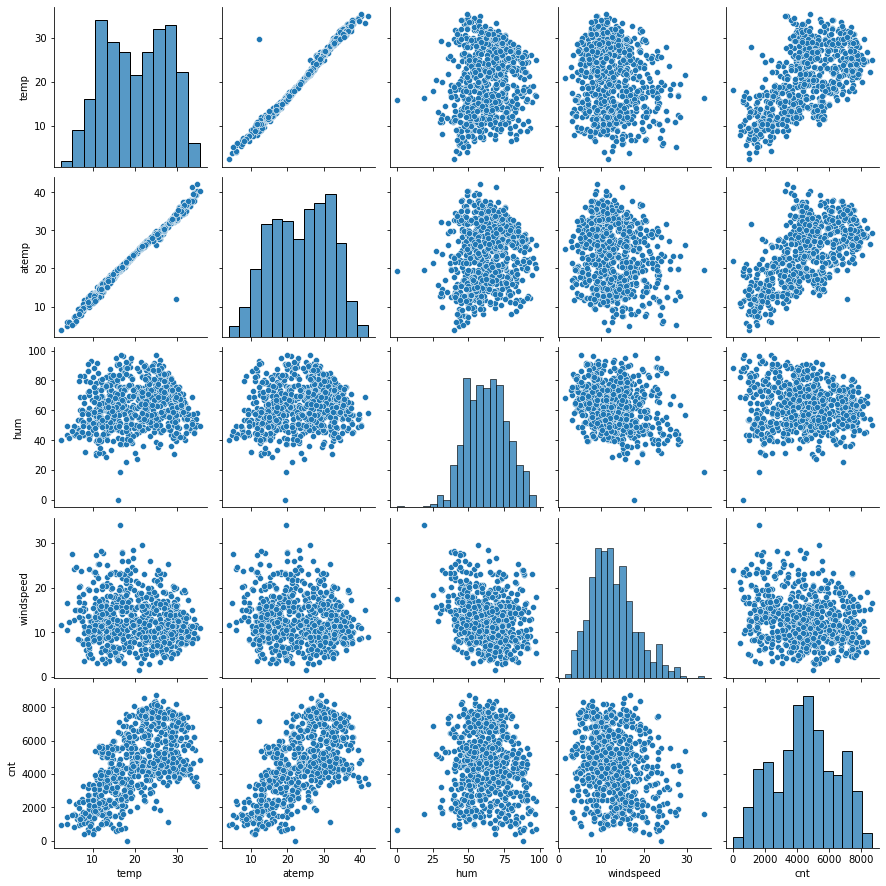

In [77]:
#Visualising Numerical Variables
sns.pairplot(bikes,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

From the above plots we see that temp and atemp have linear relationship with cnt

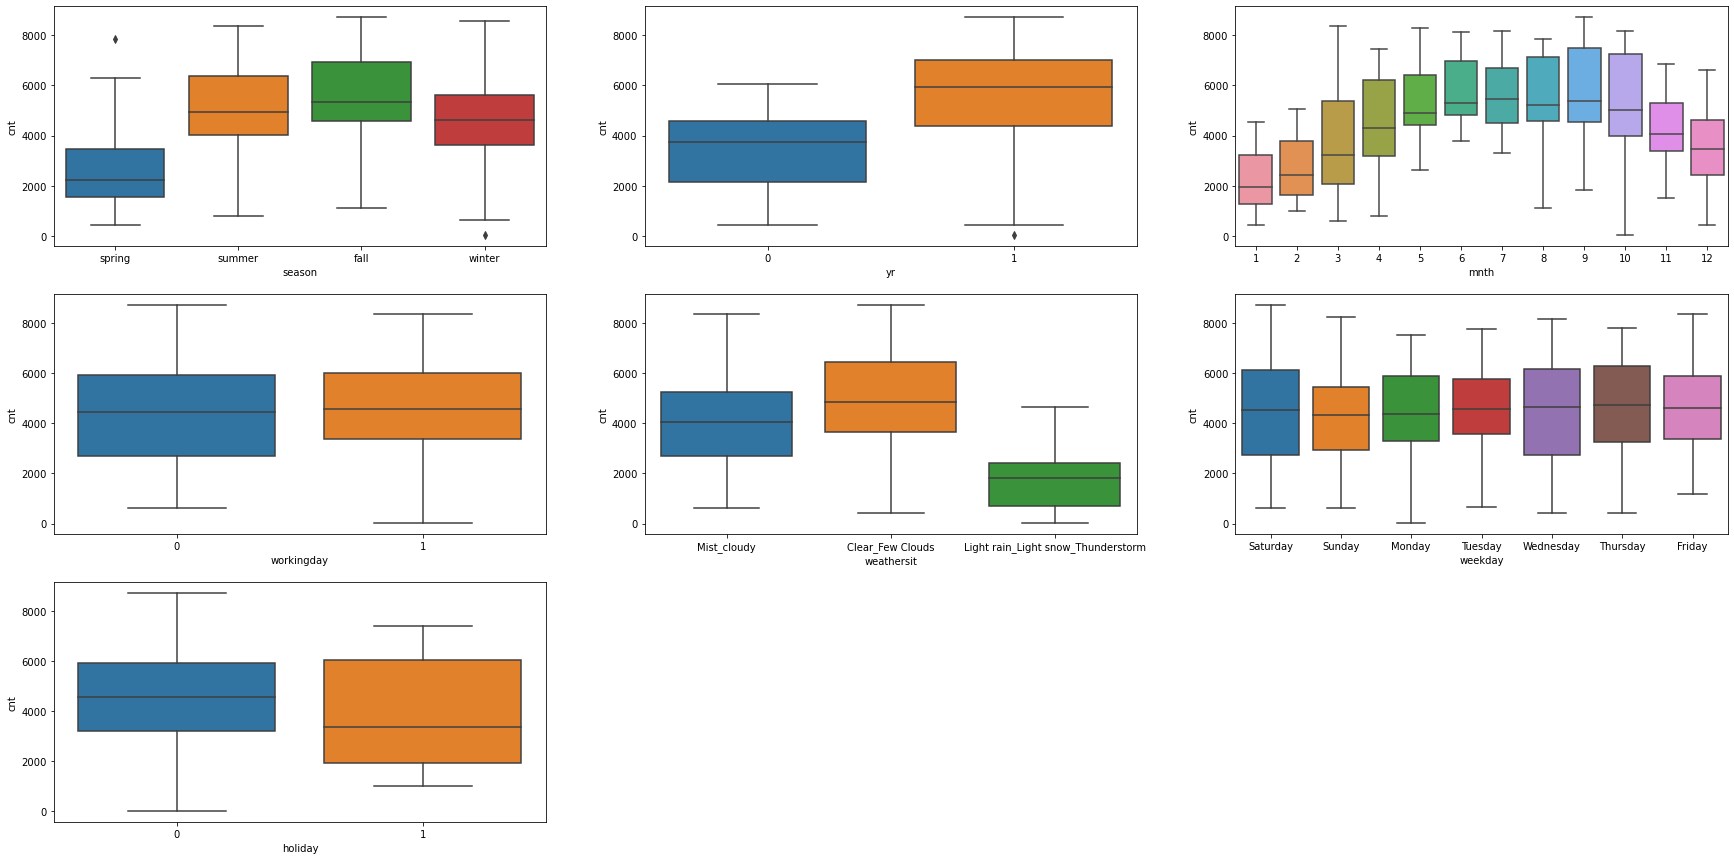

In [78]:
#Visulalising categorical data
plt.figure(figsize=(30, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikes)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikes)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes)
plt.show()

### Step 4: Data Preperation

#### Creating Dummy variables

We see that the variable season has 4 levels. Converting them to integers


In [79]:
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
dummy_season = pd.get_dummies(bikes['season'],drop_first = True)
dummy_season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [80]:
# Adding result to the original dataframe
bikes = pd.concat([bikes, dummy_season], axis = 1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [81]:
# Drop 'season' as we have created the dummies for it

bikes.drop(['season'], axis = 1, inplace = True)
bikes.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [82]:
#Creating Dummy variables for mnth

dummy_mnth = pd.get_dummies(bikes['mnth'],drop_first = True)
bikes = pd.concat([bikes, dummy_mnth], axis = 1)
bikes.drop(['mnth'], axis = 1, inplace = True)
bikes.head()


,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,3,4,5,6,7,8,9,10,11,12
0,0,0,Saturday,0,Mist_cloudy,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,0
1,0,0,Sunday,0,Mist_cloudy,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,0,Monday,1,Clear_Few Clouds,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Tuesday,1,Clear_Few Clouds,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Wednesday,1,Clear_Few Clouds,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#Creating Dummy variable for weathersit
dummy_weathersit = pd.get_dummies(bikes['weathersit'],drop_first = True)
bikes = pd.concat([bikes, dummy_weathersit], axis = 1)
bikes.drop(['weathersit'], axis = 1, inplace = True)
bikes.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,5,6,7,8,9,10,11,12,Light rain_Light snow_Thunderstorm,Mist_cloudy
0,0,0,Saturday,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,Sunday,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,Monday,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Tuesday,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,Wednesday,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
#Creating Dummy variable for weekday
dummy_weekday = pd.get_dummies(bikes['weekday'],drop_first = True)
bikes = pd.concat([bikes, dummy_weekday], axis = 1)
bikes.drop(['weekday'], axis = 1, inplace = True)
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,11,12,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
bikes.columns

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                     'temp',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                      'cnt',
                                   'spring',
                                   'summer',
                                   'winter',
                                          2,
                                          3,
                                          4,
                                          5,
                                          6,
                                          7,
                                          8,
                                          9,
                                         10,
                                         11,
                                         12,
       'Li

### Step 5: Spliting the data into train and test sets

In [86]:
np.random.seed(0)
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:
#SCALING THE NUMERICAL DATA
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [88]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])
bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,11,12,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,1,0,0,0,0


In [89]:
bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,11,12,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.084314,0.029412,0.343137,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.278131,0.169124,0.475223,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


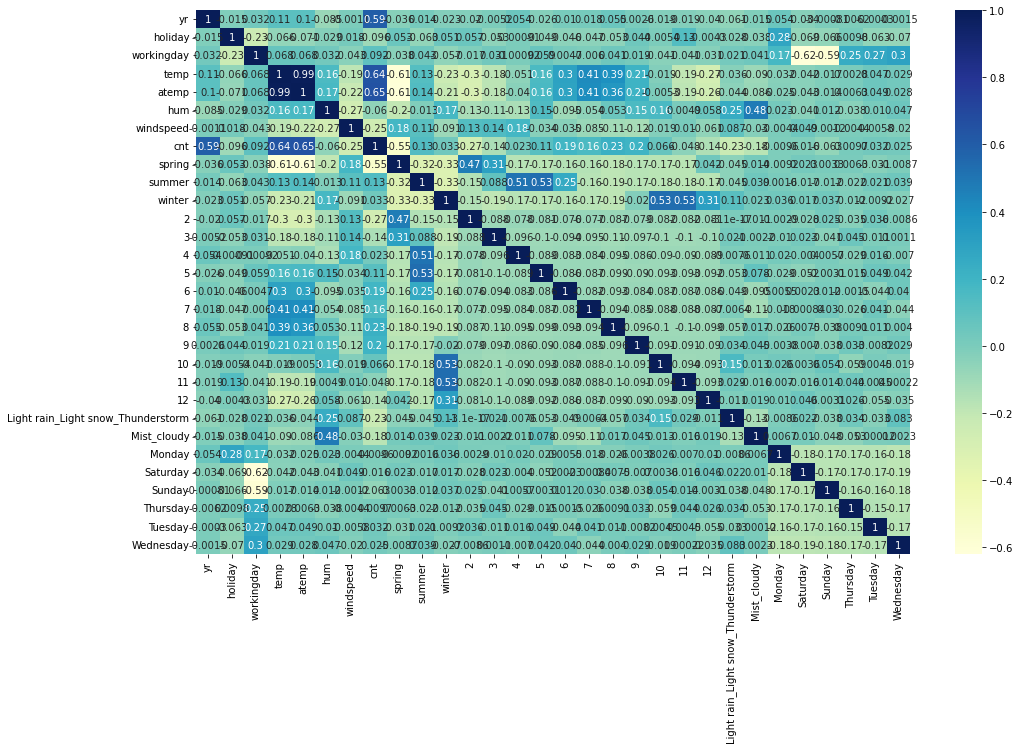

In [90]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bikes_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [91]:
#correlation between temp and atemp is 0.99 which is almost 1
#Let us drop temp and consider atemp

bikes_train.drop(['temp'],axis=1,inplace=True)
#bikes_test.drop(['temp'],axis=1,inplace=True)
bikes_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,11,12,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,1,0,0,0,0


#### Dividing into X and Y sets for the model building

In [92]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [93]:
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,2,...,11,12,Light rain_Light snow_Thunderstorm,Mist_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0


### Step 6: Building a Linear Model

In [94]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [95]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE 15 is the number of features to be selected
rfe = rfe.fit(X_train, y_train)

In [96]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 (2, False, 13),
 (3, False, 4),
 (4, False, 14),
 (5, False, 3),
 (6, False, 5),
 (7, False, 12),
 (8, True, 1),
 (9, True, 1),
 (10, False, 2),
 (11, False, 11),
 (12, False, 10),
 ('Light rain_Light snow_Thunderstorm', True, 1),
 ('Mist_cloudy', True, 1),
 ('Monday', False, 6),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 8),
 ('Tuesday', False, 7),
 ('Wednesday', False, 9)]

In [97]:
col = X_train.columns[rfe.support_]
col

Index([                                'yr',
                                  'holiday',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'summer',
                                   'winter',
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday'],
      dtype='object')

#### Building model using statsmodel, for the detailed statistics

In [98]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [99]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [100]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [101]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.97e-188
Time:                        15:06:48   Log-Likelihood:                 510.14
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     495   BIC:                            -926.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [102]:
# Calculate the VIFs for the  model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,77.32
23,Saturday,17.84
24,Sunday,16.87
6,spring,10.74
8,winter,9.47
15,8,9.26
14,7,8.40
7,summer,8.23
16,9,6.51
13,6,6.35


Holiday is insignificant in presence of other variables; hence dropping it

In [103]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

Rebuilding the model without holiday

In [104]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [105]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [106]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.4
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          1.97e-188
Time:                        15:06:48   Log-Likelihood:                 510.14
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     495   BIC:                            -926.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [107]:
X_train_new.columns

Index([                             'const',
                                       'yr',
                               'workingday',
                                    'atemp',
                                      'hum',
                                'windspeed',
                                   'spring',
                                   'summer',
                                   'winter',
                                          8,
                                          9,
       'Light rain_Light snow_Thunderstorm',
                              'Mist_cloudy',
                                 'Saturday',
                                   'Sunday'],
      dtype='object')

In [108]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [109]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,32.67
1,workingday,18.53
2,atemp,17.52
5,spring,5.12
12,Saturday,4.94
4,windspeed,4.83
13,Sunday,4.75
7,winter,4.02
6,summer,3.42
11,Mist_cloudy,2.30


Hum has very high vif hence dropping it

In [110]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

Rebuilding the model without hum

In [111]:
# Adding a constant variable  
X_train_lm = sm.add_constant(X_train_new)

In [112]:
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.2
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          6.65e-186
Time:                        15:06:48   Log-Likelihood:                 501.36
No. Observations:                 510   AIC:                            -974.7
Df Residuals:                     496   BIC:                            -915.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [113]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,16.55
2,atemp,11.93
3,windspeed,4.71
11,Saturday,4.55
12,Sunday,4.25
4,spring,3.98
5,summer,3.01
6,winter,2.95
0,yr,2.07
7,8,1.77


Working day has very high VIF.Hence dropping it

In [114]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [115]:
#Rebuilding Model
X_train_lm = sm.add_constant(X_train_new)

In [116]:
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     205.9
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          4.63e-184
Time:                        15:06:48   Log-Likelihood:                 494.21
No. Observations:                 510   AIC:                            -962.4
Df Residuals:                     497   BIC:                            -907.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [117]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.03
2,windspeed,4.53
4,summer,2.40
3,spring,2.19
0,yr,2.07
5,winter,1.93
6,8,1.70
9,Mist_cloudy,1.57
7,9,1.37
10,Saturday,1.22


Saturday has high pvalue.Hence dropping it

In [118]:
X_train_new = X_train_new.drop(["Saturday"], axis = 1)

In [119]:
#Rebuilding Model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.3
Date:                Mon, 11 Apr 2022   Prob (F-statistic):          6.33e-185
Time:                        15:06:48   Log-Likelihood:                 493.44
No. Observations:                 510   AIC:                            -962.9
Df Residuals:                     498   BIC:                            -912.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [120]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,5.00
2,windspeed,4.51
4,summer,2.40
3,spring,2.17
0,yr,2.07
5,winter,1.91
6,8,1.69
9,Mist_cloudy,1.57
7,9,1.37
10,Sunday,1.17


#### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [121]:
y_train_cnt = lm.predict(X_train_lm)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

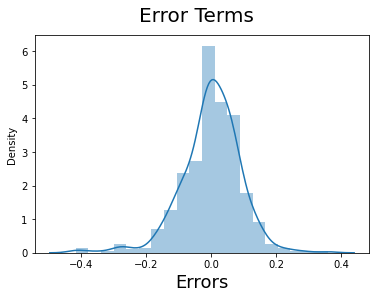

In [122]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Step 7:Making Predictions
Applying the scaling on the test sets

In [123]:

bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

#### Dividing into X_test and y_test

In [124]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [125]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [126]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Step 8:Model Evaluation

Text(0, 0.5, 'y_pred')

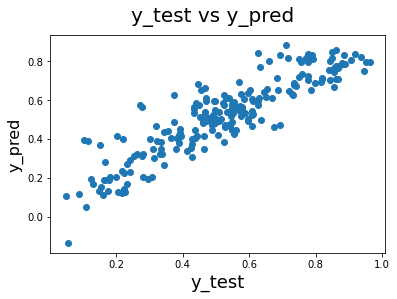

In [127]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We have a model that seems good enough to predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, thus indicating that the model is able to explain the change in demand very well.

### We can see that the equation for best fitted line is:

### cnt=(0.2349 * yr) +(0.4780*atemp)+(-0.1314*windspeed)+(-0.0570 *spring)+(0.0678*summer)+(0.0950*winter)+(0.0479* 8)+(0.0993 *9)+(-0.2808*Light rain_Light snow_Thunderstorm)+(-0.0831*Mist_cloudy)+(-0.0455*Sunday) 

### We can see the demand for bikes depends mainly on below variables:
- atemp	
- windspeed	
- summer	
- spring	
- yr	
- winter
- 8
- Mist_cloudy
- 9
- Sunday
- Light rain_Light snow_Thunderstorm	


Conclusion: High temp and good weather(Summer or Winter) positively impacts bike rentals and it is recommended that bike availability and promotions to be increased during summer months to further increase bike rentals.